# Pandas

Pandas is a powerful Python library built on top of NumPy that provides high-performance, easy-to-use data structures and data analysis tools. This comprehensive tutorial covers everything from basic to advanced concepts.

## 1. Introduction and Setup

First, let's import the necessary libraries and set up our environment. We'll use pandas for data manipulation and numpy for numerical operations.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options for better output formatting
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 8)
pd.set_option('display.precision', 2)

# Check versions
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

Pandas version: 2.2.3
NumPy version: 2.1.3


## 2. Core Data Structures

Pandas has two primary data structures:
1. **Series**: One-dimensional labeled array
2. **DataFrame**: Two-dimensional labeled data structure

Let's explore both in detail.

### Series

A Series is a one-dimensional labeled array that can hold data of any type (integer, float, string, Python objects, etc.).

In [7]:
# Creating a Series
import pandas as pd
import numpy as np

# From a list
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print("Series from list:")
print(s)
print("\nIndex:", s.index)
print("Values:", s.values)

# From a dictionary
d = {'a': 1, 'b': 2, 'c': 3}
s2 = pd.Series(d)
print("\nSeries from dictionary:")
print(s2)

Series from list:
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Index: RangeIndex(start=0, stop=6, step=1)
Values: [ 1.  3.  5. nan  6.  8.]

Series from dictionary:
a    1
b    2
c    3
dtype: int64


### DataFrame

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table.

In [8]:
# Creating DataFrame from different sources

# From a dictionary of lists
data = {
    'name': ['John', 'Anna', 'Peter', 'Linda'],
    'age': [28, 22, 35, 32],
    'city': ['New York', 'Paris', 'Berlin', 'London']
}
df1 = pd.DataFrame(data)
print("DataFrame from dictionary of lists:")
print(df1)

# From a NumPy array
dates = pd.date_range('20230101', periods=6)
df2 = pd.DataFrame(np.random.randn(6, 4), 
                  index=dates,
                  columns=['A', 'B', 'C', 'D'])
print("\nDataFrame with DateTimeIndex:")
print(df2)

# Basic DataFrame information
print("\nDataFrame Info:")
print(df2.info())
print("\nDataFrame Description:")
print(df2.describe())

DataFrame from dictionary of lists:
    name  age      city
0   John   28  New York
1   Anna   22     Paris
2  Peter   35    Berlin
3  Linda   32    London

DataFrame with DateTimeIndex:
               A     B     C     D
2023-01-01  0.42 -0.56  0.48  1.26
2023-01-02 -0.40 -0.87  1.19  0.02
2023-01-03  0.72 -1.68 -0.49 -1.14
2023-01-04  1.64 -2.64  0.24  0.28
2023-01-05  0.20 -0.55  1.08 -0.58
2023-01-06 -0.61  0.22 -0.09 -2.34

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-01-01 to 2023-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes
None

DataFrame Description:
          A     B     C     D
count  6.00  6.00  6.00  6.00
mean   0.33 -1.02  0.40 -0.42
std    0.81  1.00  0.66  1.24
...   

## 3. Data Selection and Indexing

Pandas provides multiple ways to select and index data from Series and DataFrames.

In [25]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['a', 'b', 'c', 'd', 'e'],
    'C': [1.1, 2.2, 3.3, 4.4, 5.5],
    'D': [True, False, True, False, True]
})

# Selection by label - using .loc
print("Selection by label (.loc):")
print(df.loc[0])  # Select first row
print("\nSelect multiple columns for specific rows:")
print(df.loc[0:2, ['A', 'B']])

# Selection by position - using .iloc
print("\nSelection by position (.iloc):")
print(df.iloc[0])  # Select first row
print("\nSelect specific rows and columns by position:")
print(df.iloc[0:2, 0:2])

# Boolean indexing
print("\nBoolean indexing:")
print(df[df['A'] > 2])

# Basic column selection
print("\nSelect single column:")
print(df['A'])
print("\nSelect multiple columns:")
print(df[['A', 'B']])

Selection by label (.loc):
A       1
B       a
C     1.1
D    True
Name: 0, dtype: object

Select multiple columns for specific rows:
   A  B
0  1  a
1  2  b
2  3  c

Selection by position (.iloc):
A       1
B       a
C     1.1
D    True
Name: 0, dtype: object

Select specific rows and columns by position:
   A  B
0  1  a
1  2  b

Boolean indexing:
   A  B    C      D
2  3  c  3.3   True
3  4  d  4.4  False
4  5  e  5.5   True

Select single column:
0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64

Select multiple columns:
   A  B
0  1  a
1  2  b
2  3  c
3  4  d
4  5  e


**Understanding Boolean Indexing:**

The boolean indexing operations above can be broken down into these steps:

1. `df['A'] > 2` ==> This creates a Boolean mask — a Series of `True`/`False` values indicating which elements meet the condition.

2. `df[df['A'] > 2]` ==> This filters the DataFrame to include only the rows where the condition is `True`.

You can also use:
- NOT operator: `~` (e.g., `~(df['A'] < 2)` means NOT less than 2)
- AND operator: `&` (e.g., `(df['A'] > 2) & (df['B'] == 'c')`)
- OR operator: `|` (e.g., `(df['A'] < 2) | (df['A'] > 4)`)

Note: When combining multiple conditions, always use parentheses around each condition.

## 4. Data Manipulation

Pandas provides various methods for manipulating data in DataFrames and Series.

In [26]:
# Create sample DataFrames
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': ['a', 'b', 'c']
})

df2 = pd.DataFrame({
    'A': [4, 5, 6],
    'B': ['d', 'e', 'f']
})

# Concatenation
print("Concatenating DataFrames vertically:")
print(pd.concat([df1, df2]))
print("\nConcatenating DataFrames horizontally:")
print(pd.concat([df1, df2], axis=1))

# Merging/Joining
df3 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2'],
    'A': ['A0', 'A1', 'A2']
})

df4 = pd.DataFrame({
    'key': ['K0', 'K1', 'K3'],
    'B': ['B0', 'B1', 'B2']
})

print("\nMerging DataFrames:")
print(pd.merge(df3, df4, on='key'))

# Sorting
df = pd.DataFrame({
    'col1': [2, 1, 3],
    'col2': ['b', 'a', 'c']
})
print("\nSorting by col1:")
print(df.sort_values('col1'))
print("\nSorting by col2:")
print(df.sort_values('col2'))

# Adding/Removing columns
df['col3'] = df['col1'] * 2
print("\nAdded new column:")
print(df)

# Drop column
df = df.drop('col3', axis=1)
print("\nDropped column:")
print(df)

Concatenating DataFrames vertically:
   A  B
0  1  a
1  2  b
2  3  c
0  4  d
1  5  e
2  6  f

Concatenating DataFrames horizontally:
   A  B  A  B
0  1  a  4  d
1  2  b  5  e
2  3  c  6  f

Merging DataFrames:
  key   A   B
0  K0  A0  B0
1  K1  A1  B1

Sorting by col1:
   col1 col2
1     1    a
0     2    b
2     3    c

Sorting by col2:
   col1 col2
1     1    a
0     2    b
2     3    c

Added new column:
   col1 col2  col3
0     2    b     4
1     1    a     2
2     3    c     6

Dropped column:
   col1 col2
0     2    b
1     1    a
2     3    c


## 5. Data Input and Output

Pandas provides various functions for reading and writing data in different formats.

In [27]:
# Create a sample DataFrame
df = pd.DataFrame({
    'name': ['John', 'Anna', 'Peter'],
    'age': [28, 22, 35],
    'city': ['New York', 'Paris', 'Berlin']
})

# CSV
# Write to CSV
df.to_csv('sample.csv', index=False)
print("Written to CSV file")

# Read from CSV
df_csv = pd.read_csv('sample.csv')
print("\nRead from CSV:")
print(df_csv)

# Excel
# Write to Excel
df.to_excel('sample.xlsx', index=False)
print("\nWritten to Excel file")

# Read from Excel
df_excel = pd.read_excel('sample.xlsx')
print("\nRead from Excel:")
print(df_excel)

# JSON
# Write to JSON
df.to_json('sample.json')
print("\nWritten to JSON file")

# Read from JSON
df_json = pd.read_json('sample.json')
print("\nRead from JSON:")
print(df_json)

# Clean up sample files
import os
for file in ['sample.csv', 'sample.xlsx', 'sample.json']:
    if os.path.exists(file):
        os.remove(file)

Written to CSV file

Read from CSV:
    name  age      city
0   John   28  New York
1   Anna   22     Paris
2  Peter   35    Berlin

Written to Excel file

Read from Excel:
    name  age      city
0   John   28  New York
1   Anna   22     Paris
2  Peter   35    Berlin

Written to JSON file

Read from JSON:
    name  age      city
0   John   28  New York
1   Anna   22     Paris
2  Peter   35    Berlin


## 6. Data Cleaning

Data cleaning is a crucial part of data analysis. Pandas provides various methods to handle missing data, remove duplicates, and handle data types.

In [28]:
# Create a DataFrame with missing values and duplicates
df = pd.DataFrame({
    'A': [1, 2, 2, None, 3, 4, None],
    'B': [None, 'b', 'b', None, 'c', 'd', 'e'],
    'C': [1.1, 2.2, 2.2, None, 3.3, 4.4, 5.5]
})

print("Original DataFrame:")
print(df)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Fill missing values
df_filled = df.fillna({
    'A': df['A'].mean(),  # Fill numeric with mean
    'B': 'missing',       # Fill string with 'missing'
    'C': df['C'].median() # Fill numeric with median
})
print("\nAfter filling missing values:")
print(df_filled)

# Drop rows with any missing values
df_dropped = df.dropna()
print("\nAfter dropping rows with missing values:")
print(df_dropped)

# Remove duplicates
df_unique = df.drop_duplicates()
print("\nAfter removing duplicates:")
print(df_unique)

# Convert data types
df['A'] = pd.to_numeric(df['A'], errors='coerce')  # Convert to numeric
print("\nData types after conversion:")
print(df.dtypes)

Original DataFrame:
      A     B    C
0   1.0  None  1.1
1   2.0     b  2.2
2   2.0     b  2.2
..  ...   ...  ...
4   3.0     c  3.3
5   4.0     d  4.4
6   NaN     e  5.5

[7 rows x 3 columns]

Missing values:
A    2
B    2
C    1
dtype: int64

After filling missing values:
      A        B    C
0   1.0  missing  1.1
1   2.0        b  2.2
2   2.0        b  2.2
..  ...      ...  ...
4   3.0        c  3.3
5   4.0        d  4.4
6   2.4        e  5.5

[7 rows x 3 columns]

After dropping rows with missing values:
     A  B    C
1  2.0  b  2.2
2  2.0  b  2.2
4  3.0  c  3.3
5  4.0  d  4.4

After removing duplicates:
     A     B    C
0  1.0  None  1.1
1  2.0     b  2.2
3  NaN  None  NaN
4  3.0     c  3.3
5  4.0     d  4.4
6  NaN     e  5.5

Data types after conversion:
A    float64
B     object
C    float64
dtype: object


## 7. Data Analysis and Statistics

Pandas provides various methods for data analysis and statistical computations.

In [29]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10],
    'C': [1, 3, 5, 7, 9]
})

# Basic statistics
print("Basic statistics:")
print(df.describe())

# Mean, median, mode
print("\nMean of each column:")
print(df.mean())
print("\nMedian of each column:")
print(df.median())
print("\nMode of each column:")
print(df.mode())

# Correlation and covariance
print("\nCorrelation matrix:")
print(df.corr())
print("\nCovariance matrix:")
print(df.cov())

# Grouping and aggregation
df2 = pd.DataFrame({
    'category': ['A', 'A', 'B', 'B', 'A'],
    'value': [1, 2, 3, 4, 5]
})

print("\nGroupby and aggregation:")
print(df2.groupby('category').agg(['mean', 'sum', 'count']))

Basic statistics:
          A      B     C
count  5.00   5.00  5.00
mean   3.00   6.00  5.00
std    1.58   3.16  3.16
...     ...    ...   ...
50%    3.00   6.00  5.00
75%    4.00   8.00  7.00
max    5.00  10.00  9.00

[8 rows x 3 columns]

Mean of each column:
A    3.0
B    6.0
C    5.0
dtype: float64

Median of each column:
A    3.0
B    6.0
C    5.0
dtype: float64

Mode of each column:
   A   B  C
0  1   2  1
1  2   4  3
2  3   6  5
3  4   8  7
4  5  10  9

Correlation matrix:
     A    B    C
A  1.0  1.0  1.0
B  1.0  1.0  1.0
C  1.0  1.0  1.0

Covariance matrix:
     A     B     C
A  2.5   5.0   5.0
B  5.0  10.0  10.0
C  5.0  10.0  10.0

Groupby and aggregation:
         value          
          mean sum count
category                
A         2.67   8     3
B         3.50   7     2


## 8. Time Series and Date Functionality

Pandas has extensive capabilities for handling time series data and date operations.

In [30]:
# Creating date ranges
dates = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
print("Date range:")
print(dates)

# Creating time series data
ts = pd.Series(np.random.randn(len(dates)), index=dates)
print("\nTime series data:")
print(ts)

# Date/time components
print("\nDate components:")
print("Year:", dates.year)
print("Month:", dates.month)
print("Day:", dates.day)
print("Day of week:", dates.dayofweek)

# Resampling time series data
print("\nResampling to 3-day periods (mean):")
print(ts.resample('3D').mean())

# Time zone handling
dates_tz = pd.date_range('2023-01-01', periods=5, tz='UTC')
print("\nDates with timezone:")
print(dates_tz)
print("\nConverted to US/Eastern:")
print(dates_tz.tz_convert('US/Eastern'))

Date range:
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

Time series data:
2023-01-01    1.18
2023-01-02    0.12
2023-01-03   -0.54
              ... 
2023-01-08   -0.02
2023-01-09    0.09
2023-01-10   -0.02
Freq: D, Length: 10, dtype: float64

Date components:
Year: Index([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023], dtype='int32')
Month: Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int32')
Day: Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int32')
Day of week: Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1], dtype='int32')

Resampling to 3-day periods (mean):
2023-01-01    0.25
2023-01-04   -0.23
2023-01-07   -0.19
2023-01-10   -0.02
Freq: 3D, dtype: float64

Dates with timezone:
DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-02 00:00:00+00:00',
               '2023-01-03 00:00:00+00:00

## 9. Text Data Operations

Pandas provides powerful string operations for text data manipulation.

In [31]:
# Create a DataFrame with text data
df = pd.DataFrame({
    'text': ['Hello World', 'Python Programming', 'Data Science', 'PANDAS', 'machine learning']
})

# String operations
print("Original text:")
print(df['text'])

# Convert to lowercase
print("\nLowercase:")
print(df['text'].str.lower())

# Convert to uppercase
print("\nUppercase:")
print(df['text'].str.upper())

# String length
print("\nString lengths:")
print(df['text'].str.len())

# Contains
print("\nContains 'Python':")
print(df['text'].str.contains('Python'))

# Replace
print("\nReplace 'Python' with 'Pandas':")
print(df['text'].str.replace('Python', 'Pandas'))

# Split
print("\nSplit by space:")
print(df['text'].str.split(' '))

Original text:
0           Hello World
1    Python Programming
2          Data Science
3                PANDAS
4      machine learning
Name: text, dtype: object

Lowercase:
0           hello world
1    python programming
2          data science
3                pandas
4      machine learning
Name: text, dtype: object

Uppercase:
0           HELLO WORLD
1    PYTHON PROGRAMMING
2          DATA SCIENCE
3                PANDAS
4      MACHINE LEARNING
Name: text, dtype: object

String lengths:
0    11
1    18
2    12
3     6
4    16
Name: text, dtype: int64

Contains 'Python':
0    False
1     True
2    False
3    False
4    False
Name: text, dtype: bool

Replace 'Python' with 'Pandas':
0           Hello World
1    Pandas Programming
2          Data Science
3                PANDAS
4      machine learning
Name: text, dtype: object

Split by space:
0           [Hello, World]
1    [Python, Programming]
2          [Data, Science]
3                 [PANDAS]
4      [machine, learning]
Name: text,

## 10. Advanced Topics

### 10.1 Applying Functions

Pandas provides several ways to apply functions to your data:

In [32]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': ['a', 'b', 'c'],
    'C': [1.1, 2.2, 3.3]
})

# Using apply() on DataFrame
print("Apply function to entire DataFrame:")
print(df.apply(lambda x: x * 2))

# Using apply() on a Series
print("\nApply function to a single column:")
print(df['A'].apply(lambda x: x * 2))

# Using applymap() for element-wise operations
print("\nElement-wise operations with applymap:")
print(df.applymap(lambda x: str(x) + '_modified'))

# Using map() for Series
print("\nMapping values in a Series:")
mapping = {'a': 'x', 'b': 'y', 'c': 'z'}
print(df['B'].map(mapping))

Apply function to entire DataFrame:
   A   B    C
0  2  aa  2.2
1  4  bb  4.4
2  6  cc  6.6

Apply function to a single column:
0    2
1    4
2    6
Name: A, dtype: int64

Element-wise operations with applymap:
            A           B             C
0  1_modified  a_modified  1.1_modified
1  2_modified  b_modified  2.2_modified
2  3_modified  c_modified  3.3_modified

Mapping values in a Series:
0    x
1    y
2    z
Name: B, dtype: object


C:\Users\asus\AppData\Local\Temp\ipykernel_18296\2107425066.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: str(x) + '_modified'))


### 10.2 Multi-Index / Hierarchical Indexing

Multi-index (or hierarchical indexing) is an important feature for working with higher-dimensional data in a two-dimensional DataFrame.

In [33]:
# Create a multi-index DataFrame
arrays = [
    ['A', 'A', 'B', 'B'],
    [1, 2, 1, 2]
]
index = pd.MultiIndex.from_arrays(arrays, names=('letter', 'number'))
df_multi = pd.DataFrame({'value': [100, 200, 300, 400]}, index=index)
print("Multi-index DataFrame:")
print(df_multi)

# Accessing data with multi-index
print("\nAccessing specific values:")
print(df_multi.loc['A'])
print("\nAccessing even more specific values:")
print(df_multi.loc['A', 1])

# Create multi-index from DataFrame columns
df = pd.DataFrame({
    'year': [2024, 2024, 2025, 2025],
    'quarter': [1, 2, 1, 2],
    'value': [100, 200, 300, 400]
})
df_multi2 = df.set_index(['year', 'quarter'])
print("\nMulti-index from DataFrame columns:")
print(df_multi2)

Multi-index DataFrame:
               value
letter number       
A      1         100
       2         200
B      1         300
       2         400

Accessing specific values:
        value
number       
1         100
2         200

Accessing even more specific values:
value    100
Name: (A, 1), dtype: int64

Multi-index from DataFrame columns:
              value
year quarter       
2024 1          100
     2          200
2025 1          300
     2          400


### 10.3 Advanced DataFrame Combining

There are multiple ways to combine DataFrames in pandas:

In [34]:
# Create sample DataFrames
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['John', 'Jane', 'Bob', 'Alice']
})

df2 = pd.DataFrame({
    'id': [1, 2, 5, 6],
    'age': [25, 30, 35, 40]
})

# Different types of merges
print("Inner merge (only matching rows):")
print(pd.merge(df1, df2, on='id', how='inner'))

print("\nLeft merge (keep all rows from left DataFrame):")
print(pd.merge(df1, df2, on='id', how='left'))

print("\nRight merge (keep all rows from right DataFrame):")
print(pd.merge(df1, df2, on='id', how='right'))

print("\nOuter merge (keep all rows from both DataFrames):")
print(pd.merge(df1, df2, on='id', how='outer'))

# Join operation
df3 = pd.DataFrame({
    'age': [25, 30, 35],
    'city': ['NY', 'LA', 'SF']
}, index=['John', 'Jane', 'Bob'])

df4 = pd.DataFrame({
    'salary': [50000, 60000, 45000],
    'dept': ['IT', 'HR', 'IT']
}, index=['John', 'Jane', 'Alice'])

print("\nJoin operation:")
print(df3.join(df4, how='outer'))

Inner merge (only matching rows):
   id  name  age
0   1  John   25
1   2  Jane   30

Left merge (keep all rows from left DataFrame):
   id   name   age
0   1   John  25.0
1   2   Jane  30.0
2   3    Bob   NaN
3   4  Alice   NaN

Right merge (keep all rows from right DataFrame):
   id  name  age
0   1  John   25
1   2  Jane   30
2   5   NaN   35
3   6   NaN   40

Outer merge (keep all rows from both DataFrames):
   id   name   age
0   1   John  25.0
1   2   Jane  30.0
2   3    Bob   NaN
3   4  Alice   NaN
4   5    NaN  35.0
5   6    NaN  40.0

Join operation:
        age city   salary dept
Alice   NaN  NaN  45000.0   IT
Bob    35.0   SF      NaN  NaN
Jane   30.0   LA  60000.0   HR
John   25.0   NY  50000.0   IT


### 10.4 Advanced Iteration Methods

Pandas provides several ways to iterate over DataFrames efficiently:

In [35]:
# Create a sample DataFrame
df = pd.DataFrame({
    'name': ['John', 'Jane', 'Bob'],
    'age': [25, 30, 35],
    'city': ['NY', 'LA', 'SF']
})

# Iterate over columns
print("Iterating over columns:")
for column, series in df.items():
    print(f"\nColumn: {column}")
    print(series)

# Iterate over rows
print("\nIterating over rows:")
for index, row in df.iterrows():
    print(f"\nRow {index}:")
    print(row)

# Iterate over rows (more efficient)
print("\nIterating over rows with itertuples():")
for row in df.itertuples():
    print(row)

# Iterate over rows and columns
print("\nIterating over rows and columns:")
for index, row in df.iterrows():
    for column, value in row.items():
        print(f"At index {index}, column {column}: {value}")

Iterating over columns:

Column: name
0    John
1    Jane
2     Bob
Name: name, dtype: object

Column: age
0    25
1    30
2    35
Name: age, dtype: int64

Column: city
0    NY
1    LA
2    SF
Name: city, dtype: object

Iterating over rows:

Row 0:
name    John
age       25
city      NY
Name: 0, dtype: object

Row 1:
name    Jane
age       30
city      LA
Name: 1, dtype: object

Row 2:
name    Bob
age      35
city     SF
Name: 2, dtype: object

Iterating over rows with itertuples():
Pandas(Index=0, name='John', age=25, city='NY')
Pandas(Index=1, name='Jane', age=30, city='LA')
Pandas(Index=2, name='Bob', age=35, city='SF')

Iterating over rows and columns:
At index 0, column name: John
At index 0, column age: 25
At index 0, column city: NY
At index 1, column name: Jane
At index 1, column age: 30
At index 1, column city: LA
At index 2, column name: Bob
At index 2, column age: 35
At index 2, column city: SF


### 10.5 Advanced Visualization

Pandas integrates well with matplotlib to create various types of visualizations:

<Figure size 1000x600 with 0 Axes>

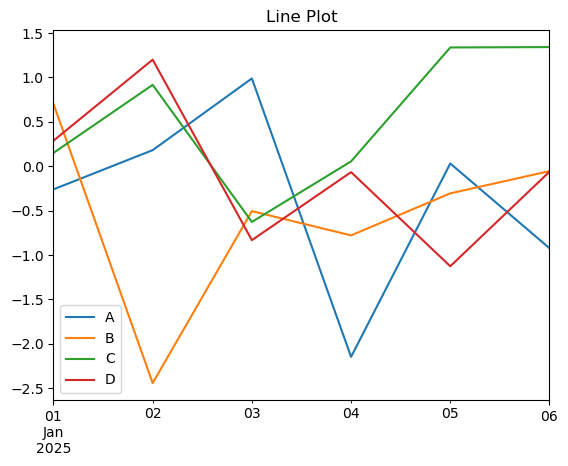

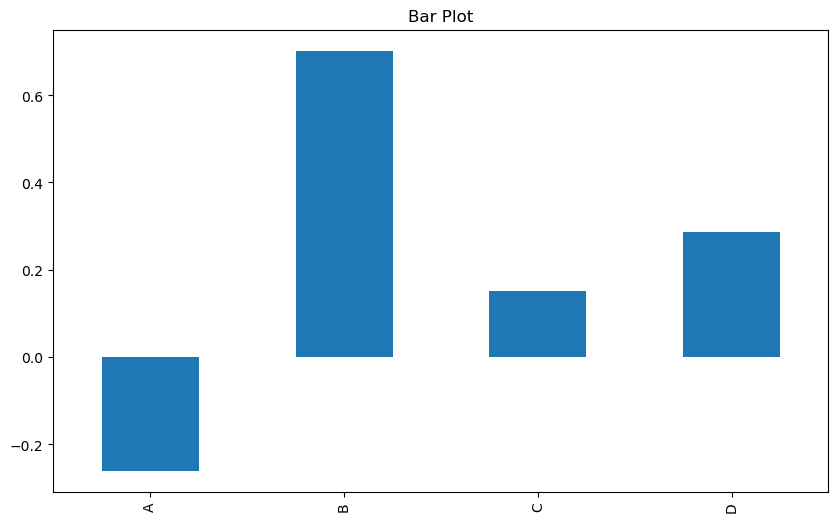

<Figure size 1000x600 with 0 Axes>

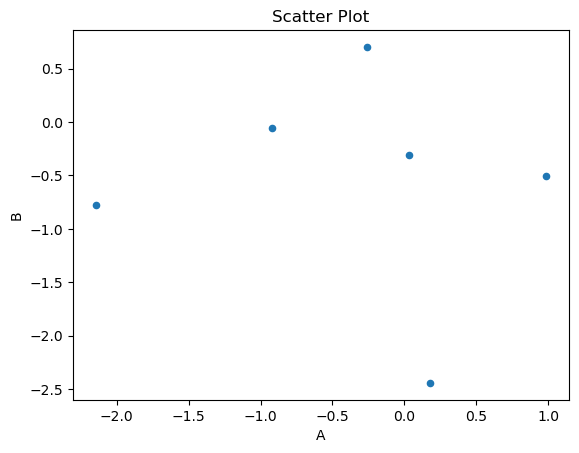

<Figure size 1000x600 with 0 Axes>

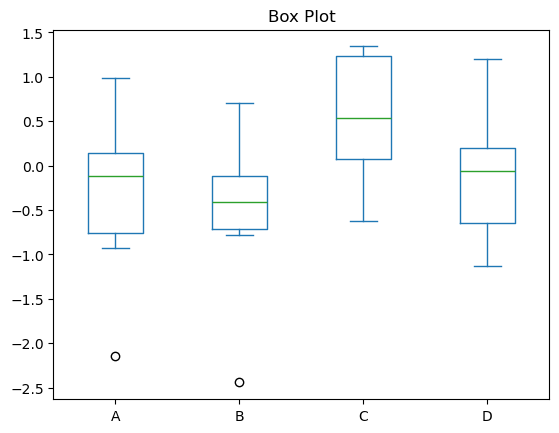

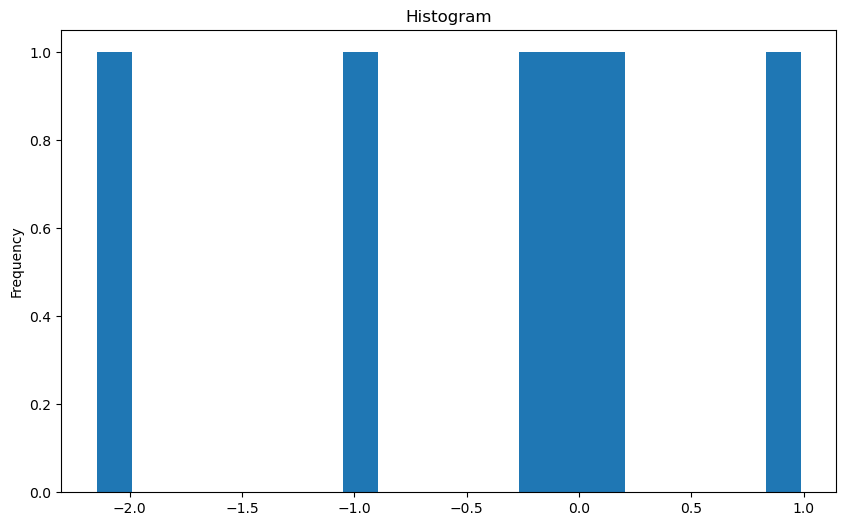

In [36]:
# Create sample data
import matplotlib.pyplot as plt

# Time series data
dates = pd.date_range('2025-01-01', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), 
                 index=dates, 
                 columns=['A', 'B', 'C', 'D'])

# Line plot
plt.figure(figsize=(10, 6))
df.plot()
plt.title('Line Plot')
plt.show()

# Bar plot
plt.figure(figsize=(10, 6))
df.iloc[0].plot(kind='bar')
plt.title('Bar Plot')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
df.plot.scatter(x='A', y='B')
plt.title('Scatter Plot')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
df.plot.box()
plt.title('Box Plot')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
df['A'].plot.hist(bins=20)
plt.title('Histogram')
plt.show()

### Enhanced Mini Project Features

This enhanced version of the Titanic analysis demonstrates all major pandas concepts:

1. Series Operations
   - Series creation from DataFrame columns
   - Statistical operations on Series
   - Categorical binning with `pd.cut`

2. Advanced Indexing
   - Label-based indexing with `.loc`
   - Position-based indexing with `.iloc`
   - Boolean indexing and masking

3. Data Cleaning & Manipulation
   - Sophisticated missing value handling
   - String operations (name title extraction)
   - Sorting and ranking

4. Feature Engineering
   - Date/time operations
   - Derived columns
   - Complex transformations

5. Advanced Data Operations
   - Merging datasets
   - Multi-level groupby
   - Pivot tables
   - Time series resampling

6. Visualization
   - Bar plots
   - Box plots
   - Histograms
   - Time series plots

The final output (`titanic_enhanced.csv`) contains all original and derived features for further analysis.

In [37]:
# Mini Project: Enhanced Titanic Survival Analysis

# 1. Load and Inspect
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)
print("Head of dataset:")
print(titanic.head())

# 2. Explore the Data
print("\nShape:", titanic.shape)
print("\nMissing Values:\n", titanic.isnull().sum())
print("\nSummary statistics:")
print(titanic.describe(include='all'))

# 3. Series Operations
# Create and manipulate passenger age Series
age_series = pd.Series(titanic['Age'].dropna(), name='Age')
print("\nAge Series Statistics:")
print("Mean Age:", age_series.mean())
print("Median Age:", age_series.median())
print("Age Range:", age_series.min(), "to", age_series.max())

# Create fare categories Series
fare_categories = pd.cut(titanic['Fare'], 
                        bins=[0, 20, 50, 100, 600], 
                        labels=['Low', 'Medium', 'High', 'Premium'])
print("\nFare Categories Distribution:")
print(fare_categories.value_counts())

Head of dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  ...            Ticket  \
0                            Braund, Mr. Owen Harris  ...         A/5 21171   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  ...          PC 17599   
2                             Heikkinen, Miss. Laina  ...  STON/O2. 3101282   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  ...            113803   
4                           Allen, Mr. William Henry  ...            373450   

    Fare  Cabin  Embarked  
0   7.25    NaN         S  
1  71.28    C85         C  
2   7.92    NaN         S  
3  53.10   C123         S  
4   8.05    NaN         S  

[5 rows x 12 columns]

Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
       

In [38]:
# 4. Advanced Indexing and Selection
# Using loc for label-based indexing
print("First class female passengers:")
first_class_women = titanic.loc[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 1),
                               ['Name', 'Age', 'Survived']]
print(first_class_women.head())

# Using iloc for position-based indexing
print("\nFirst 5 passengers, selected columns:")
print(titanic.iloc[0:5, [1, 4, 5]])  # Name, Sex, Age columns

# Boolean indexing
survived_mask = titanic['Survived'] == 1
rich_mask = titanic['Fare'] > 100
rich_survivors = titanic[survived_mask & rich_mask]
print("\nNumber of rich survivors:", len(rich_survivors))

# 5. Data Cleaning and Manipulation
# Fill missing ages with median by passenger class
for pclass in [1, 2, 3]:
    median_age = titanic.loc[titanic['Pclass'] == pclass, 'Age'].median()
    titanic.loc[titanic['Pclass'] == pclass, 'Age'] = \
        titanic.loc[titanic['Pclass'] == pclass, 'Age'].fillna(median_age)

# Extract titles from names
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print("\nUnique titles found:", titanic['Title'].unique())

# Sort by fare descending
print("\nTop 5 highest paying passengers:")
print(titanic.nlargest(5, 'Fare')[['Name', 'Fare', 'Pclass']])

First class female passengers:
                                                 Name   Age  Survived
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0         1
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0         1
11                           Bonnell, Miss. Elizabeth  58.0         1
31     Spencer, Mrs. William Augustus (Marie Eugenie)   NaN         1
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0         1

First 5 passengers, selected columns:
   Survived     Sex   Age
0         0    male  22.0
1         1  female  38.0
2         1  female  26.0
3         1  female  35.0
4         0    male  35.0

Number of rich survivors: 39

Unique titles found: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']

Top 5 highest paying passengers:
                                   Name    Fare  Pclass
258                    Ward, Miss. Anna  512.33       1
679  Cardeza, Mr. Thomas Drake Mart

In [39]:
# 6. Feature Engineering and Advanced Data Manipulation
# Create date columns (assuming Titanic sailed on April 10, 1912)
titanic['Sailing_Date'] = pd.to_datetime('1912-04-10')
titanic['Approx_Birth_Year'] = 1912 - titanic['Age']
print("Passenger birth years summary:")
print(titanic['Approx_Birth_Year'].describe())

# Create passenger groups dataset for demonstrating merge
passenger_groups = titanic.groupby('Title').agg({
    'Survived': 'mean',
    'Age': 'mean',
    'Fare': 'mean'
}).round(2)

# Merge with original data
titanic = titanic.merge(
    passenger_groups,
    left_on='Title',
    right_index=True,
    suffixes=('', '_group_avg')
)

print("\nPassenger data with group averages:")
print(titanic[['Name', 'Title', 'Survived', 'Survived_group_avg']].head())

# Time series analysis of fares
fare_time_series = pd.Series(
    titanic['Fare'].values,
    index=pd.date_range('1912-04-10', periods=len(titanic), freq='H')
)
print("\nHourly fare statistics:")
print(fare_time_series.resample('6H').agg(['mean', 'count']))

Passenger birth years summary:
count     891.00
mean     1882.93
std        13.24
          ...   
50%      1886.00
75%      1890.00
max      1911.58
Name: Approx_Birth_Year, Length: 8, dtype: float64

Passenger data with group averages:
                                                Name Title  Survived  \
0                            Braund, Mr. Owen Harris    Mr         0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs         1   
2                             Heikkinen, Miss. Laina  Miss         1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs         1   
4                           Allen, Mr. William Henry    Mr         0   

   Survived_group_avg  
0                0.16  
1                0.79  
2                0.70  
3                0.79  
4                0.16  

Hourly fare statistics:
                      mean  count
1912-04-10 00:00:00  26.01      6
1912-04-10 06:00:00  26.23      6
1912-04-10 12:00:00  17.55      6
...                    .

C:\Users\asus\AppData\Local\Temp\ipykernel_18296\2058887619.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range('1912-04-10', periods=len(titanic), freq='H')
C:\Users\asus\AppData\Local\Temp\ipykernel_18296\2058887619.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  print(fare_time_series.resample('6H').agg(['mean', 'count']))


In [ ]:
# 7. Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Survival rate by passenger class and sex
plt.figure(figsize=(12, 5))
survival_by_class_sex = titanic.pivot_table(
    values='Survived',
    index='Sex',
    columns='Pclass',
    aggfunc='mean'
)
survival_by_class_sex.plot(kind='bar')
plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.legend(title='Passenger Class')
plt.tight_layout()
plt.show()

# Age distribution by survival
plt.figure(figsize=(12, 5))
titanic.boxplot(column='Age', by='Survived')
plt.title('Age Distribution by Survival')
plt.suptitle('')  # This removes the automatic suptitle
plt.show()

# Fare distribution (histogram)
plt.figure(figsize=(12, 5))
titanic['Fare'].hist(bins=50)
plt.title('Distribution of Ticket Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Time series of average fares
plt.figure(figsize=(12, 5))
fare_time_series.resample('6H').mean().plot()
plt.title('Average Fares Over Time (6-hour intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.show()

In [ ]:
# 8. Final Analysis and Export
# Multi-index groupby analysis
multi_analysis = titanic.groupby(['Sex', 'Pclass', 'Title']).agg({
    'Survived': ['count', 'mean'],
    'Age': 'mean',
    'Fare': ['mean', 'max']
}).round(2)

print("Multi-level analysis:")
print(multi_analysis.head(10))

# Create some example categories for pivot table
titanic['Age_Group'] = pd.cut(titanic['Age'], 
                             bins=[0, 12, 18, 35, 50, 100],
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Complex pivot table
survival_pivot = pd.pivot_table(
    titanic,
    values=['Survived', 'Fare'],
    index=['Sex', 'Age_Group'],
    columns='Pclass',
    aggfunc={'Survived': 'mean', 'Fare': 'mean'}
).round(2)

print("\nSurvival and fare analysis by demographics:")
print(survival_pivot)

# Save enhanced dataset
titanic.to_csv('titanic_enhanced.csv', index=False)
print("\n✅ Enhanced Titanic dataset saved to titanic_enhanced.csv")

**Note:** Run the Mini Project cell below to execute the Titanic analysis. It will load data from the given URL, perform cleaning and feature engineering, print summary statistics and survival rates, then save a cleaned CSV named `titanic_cleaned.csv` in the current directory.

## Conclusion

This comprehensive guide has covered both fundamental and advanced features of pandas, providing you with a solid foundation for data analysis in Python. Here's a summary of what we've covered:

1. Core Data Structures
   - Series: One-dimensional labeled arrays
   - DataFrame: Two-dimensional labeled data structures

2. Essential Operations
   - Data Selection and Indexing
   - Data Manipulation and Transformation
   - Data Input/Output (CSV, Excel, JSON)
   - Data Cleaning and Preprocessing

3. Data Analysis
   - Statistical Operations
   - Time Series Analysis
   - Text Data Operations
   - Grouping and Aggregation

4. Advanced Features
   - Function Application (map, apply, applymap)
   - Multi-Index / Hierarchical Indexing
   - Advanced DataFrame Combining
   - Efficient Iteration Methods
   - Data Visualization with matplotlib

5. Best Practices
   - Memory Efficient Operations
   - Performance Optimization
   - Working with Large Datasets

For more detailed information and advanced usage, refer to the official pandas documentation at https://pandas.pydata.org/docs/

Remember: Pandas is a powerful tool for data manipulation and analysis, and mastering these concepts will significantly enhance your data science and analysis capabilities in Python.